In [84]:
# import required packages
import pandas as pd
import numpy as np
import os
#test code change
#geetha changes
# change to the required working directory
os.chdir(r'C:\Projects\Zorbium MVP')

# Data cleaning

In [85]:
emaildata = pd.read_excel(r"Consolidated list v2.xlsx",sheet_name='All PH')
emaildata.head()

,CRM ID,Account Name,Account Classification,Mars Exclusion\nFlag,Inactive Flag,Any Exclusion\nFlag,Cat Name\nFlag,Cat Friendly Clinics\nFlag,Specialty Clinics,Nocita Users,Feline pain webinar\nattendees Flag,VIP program\nattendees Flag
0,1000014,Midway Grocery,Wholesaler / Retailer,0,0,0,0,0,0,0,0,0
1,1000027,Northern Hills Veterinary Clinic,Veterinary Practice,0,0,0,0,0,0,0,0,0
2,1000030,South Water Animal Hospital,Veterinary Practice,0,0,0,0,0,0,0,0,0
3,1000032,Lewisburg Animal Hospital,Veterinary Practice,0,0,0,0,0,0,0,0,0
4,1000033,County Line Veterinary Clinic,Veterinary Practice,0,0,0,0,1,0,0,0,0


In [86]:
# read data from excel to python
data = pd.read_excel(r"Cat data EDI.xlsx",sheet_name='Sheet6')
#check if data is displayed correctly
data.head()

,CRM ID,Territory Number,Product Line,Invoice Date,Unnamed: 4
0,1000027,US_CA_T9I,Onsior,2020-02-17,68
1,1000027,US_CA_T9I,Onsior,2020-09-01,68
2,1000027,US_CA_T9I,Rabvac,2020-06-02,-368
3,1000027,US_CA_T9I,Rabvac,2021-04-06,57
4,1000027,US_CA_T9I,Rabvac,2021-04-13,115


In [164]:
dict1 = dict(zip(data['CRM ID'],data['Territory Number']))

In [87]:
data.rename({'Unnamed: 4':'Sales'},axis=1,inplace=True)

In [88]:
data = data[data['Sales']>0]

In [89]:
data.fillna(0,inplace=True)
data3 = data.pivot_table('Sales', ['CRM ID','Territory Number','Invoice Date'], 'Product Line').reset_index()
data3.fillna(0,inplace=True)
data3.head()

Product Line,CRM ID,Territory Number,Invoice Date,Elura,Nocita,Onsior,Rabvac,Ultra Fel-O-Vax
0,1000027,US_CA_T9I,2020-02-17,0.0,0.0,68.0,0.0,0.0
1,1000027,US_CA_T9I,2020-09-01,0.0,0.0,68.0,0.0,0.0
2,1000027,US_CA_T9I,2021-04-06,0.0,0.0,0.0,57.0,0.0
3,1000027,US_CA_T9I,2021-04-13,0.0,0.0,0.0,115.0,0.0
4,1000027,US_CA_T9I,2021-04-26,0.0,0.0,0.0,115.0,0.0


In [90]:
#Users data is one year and only Elura is from the time of launch

In [91]:
data=data[data['Invoice Date']<"2022-06-01"]
data3=data3[data3['Invoice Date']<"2022-06-01"]
#data=data[data['Invoice Date']>"2022-05-31"]

In [92]:
rawdata = data.copy()

In [93]:
data = data[data['Invoice Date']>"2021-05-31"]
data3=data3[data3['Invoice Date']>"2021-05-31"]

# Functions

In [94]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def kMeans(df,ncluster):
    # Kmeans with K=5
    model_clus5 = KMeans(n_clusters = ncluster, random_state = 1234,max_iter=50)
    model_clus5.fit(df)
    from sklearn.metrics import silhouette_score
    sse_ = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k).fit(df)
        sse_.append([k, silhouette_score(df, kmeans.labels_)])
    # sum of squared distances
    ssd = []
    for num_clusters in list(range(1,21)):
        model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
        model_clus.fit(df)
        ssd.append(model_clus.inertia_)

    print(plt.plot(ssd))
    return(model_clus5)
def quarterdef(datecol):
    datecol = str(datecol)
    if ((datecol < '2021-09-01')&('2021-06-01' <= datecol)):
        quart = 'Q1'
    elif ((datecol < '2021-12-01')&('2021-09-01' <= datecol)):
        quart = 'Q2'
    elif ((datecol < '2022-03-01')&('2021-12-01' <= datecol)):
        quart = 'Q3'
    else:
        quart = 'Q4'
    return quart   

# Quartiling the sales based on the months

In [95]:
data.head()
nocita = data[data['Product Line']=='Nocita']
nocita =nocita[nocita['Invoice Date']>= '2021-06-01']
nocita['Quarter'] = nocita['Invoice Date'].apply(quarterdef)

nocitaquart = nocita.groupby(['CRM ID','Quarter']).Sales.sum().reset_index()

nocitaquart = nocitaquart.pivot_table('Sales',['CRM ID'],'Quarter').reset_index()
nocitaquart.fillna(0,inplace=True)
nocitaquart


df=pd.DataFrame()
df['CRM ID'] = nocitaquart['CRM ID']
df['Q1'] = pd.qcut(nocitaquart['Q1'] + jitter(nocitaquart['Q1']), 4, labels=False)
df['Q2'] = pd.qcut(nocitaquart['Q2'] + jitter(nocitaquart['Q2']), 4, labels=False)
df['Q3'] = pd.qcut(nocitaquart['Q3']+ jitter(nocitaquart['Q3']), 4, labels=False)
df['Q4'] = pd.qcut(nocitaquart['Q4']+ jitter(nocitaquart['Q4']), 4, labels=False)

df.head()

,CRM ID,Q1,Q2,Q3,Q4
0,1000092,2,0,1,0
1,1000183,1,0,0,0
2,1000303,2,0,2,2
3,1000327,0,1,1,2
4,1000353,2,1,2,1


In [14]:
df.to_excel("nocita_sunil1.xlsx")
df

,CRM ID,Q1,Q2,Q3,Q4
0,1000092,1,0,1,0
1,1000183,1,0,1,0
2,1000303,2,1,2,2
3,1000327,0,0,0,2
4,1000353,2,1,2,1
...,...,...,...,...,...
1928,20454404,0,0,0,2
1929,20455651,2,2,1,0
1930,20456078,1,1,0,1
1931,20461062,1,0,1,1


# Excluding Rabvac

In [96]:
print(data3.shape)
data3.head()

(284177, 8)


Product Line,CRM ID,Territory Number,Invoice Date,Elura,Nocita,Onsior,Rabvac,Ultra Fel-O-Vax
7,1000027,US_CA_T9I,2021-06-02,0.0,0.0,0.0,201.0,0.0
8,1000027,US_CA_T9I,2022-04-19,0.0,0.0,0.0,296.0,0.0
9,1000027,US_CA_T9I,2022-05-02,0.0,0.0,0.0,296.0,0.0
10,1000027,US_CA_T9I,2022-05-26,0.0,0.0,0.0,296.0,0.0
15,1000030,US_CA_T6X,2021-08-11,0.0,0.0,0.0,144.0,0.0


In [97]:
Rabvac = data3.copy()

In [98]:
Rabvac = Rabvac.groupby('CRM ID').agg({'Elura':'sum','Nocita':'sum','Onsior':'sum','Rabvac':'sum','Ultra Fel-O-Vax':'sum'},inplace=True)

In [99]:

Rabvac.loc[Rabvac['Rabvac']>0,'RabvacFlag'] =1
Rabvac.loc[Rabvac['Ultra Fel-O-Vax']>0,'UltraFlag'] =1
Rabvac.loc[Rabvac['Elura']+Rabvac['Nocita']+Rabvac['Onsior']>0,'OtherFlag'] =1

#Rabvac.loc[(Rabvac['OtherFlag'] == 0) & (Rabvac['UltraFlag'] == 1) & (Rabvac['RabvacFlag'] == 0),'Flag'] =1
Rabvac.fillna(0,inplace=True)


In [100]:
Rabvac.head()

,Elura,Nocita,Onsior,Rabvac,Ultra Fel-O-Vax,RabvacFlag,UltraFlag,OtherFlag
CRM ID,,,,,,,,
1000027,0.0,0.0,0.0,1089.0,0.0,1.0,0.0,0.0
1000030,0.0,0.0,0.0,288.0,0.0,1.0,0.0,0.0
1000032,159.0,0.0,1527.0,0.0,0.0,0.0,0.0,1.0
1000033,0.0,0.0,0.0,140.0,0.0,1.0,0.0,0.0
1000038,0.0,0.0,71.0,435.0,359.0,1.0,1.0,1.0


In [101]:
#Rabvac.to_excel("clinics1.xlsx")

In [102]:
Rabvac = Rabvac.reset_index()
Rabvac

,CRM ID,Elura,Nocita,Onsior,Rabvac,Ultra Fel-O-Vax,RabvacFlag,UltraFlag,OtherFlag
0,1000027,0.0,0.0,0.0,1089.0,0.0,1.0,0.0,0.0
1,1000030,0.0,0.0,0.0,288.0,0.0,1.0,0.0,0.0
2,1000032,159.0,0.0,1527.0,0.0,0.0,0.0,0.0,1.0
3,1000033,0.0,0.0,0.0,140.0,0.0,1.0,0.0,0.0
4,1000038,0.0,0.0,71.0,435.0,359.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
29812,20471975,0.0,0.0,0.0,145.0,0.0,1.0,0.0,0.0
29813,20471982,0.0,0.0,44.0,0.0,0.0,0.0,0.0,1.0
29814,20471994,0.0,0.0,0.0,30.0,0.0,1.0,0.0,0.0
29815,20472013,0.0,0.0,800.0,0.0,0.0,0.0,0.0,1.0


In [103]:
RabvacUltra = Rabvac[(Rabvac['UltraFlag'] == 1) & (Rabvac['RabvacFlag']== 0)]

In [104]:
RabvacUltra

,CRM ID,Elura,Nocita,Onsior,Rabvac,Ultra Fel-O-Vax,RabvacFlag,UltraFlag,OtherFlag
13,1000079,26.0,0.0,0.0,0.0,4785.0,0.0,1.0,1.0
37,1000152,0.0,0.0,1063.0,0.0,914.0,0.0,1.0,1.0
60,1000214,0.0,0.0,506.0,0.0,1668.0,0.0,1.0,1.0
70,1000235,0.0,0.0,1853.0,0.0,4638.0,0.0,1.0,1.0
77,1000256,106.0,0.0,417.0,0.0,3825.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
29429,20405110,0.0,0.0,0.0,0.0,471.0,0.0,1.0,0.0
29446,20416755,0.0,0.0,0.0,0.0,185.0,0.0,1.0,0.0
29474,20419233,0.0,0.0,108.0,0.0,185.0,0.0,1.0,1.0
29503,20422304,27.0,0.0,145.0,0.0,370.0,0.0,1.0,1.0


In [105]:
list1 = RabvacUltra['CRM ID'].unique().tolist()

In [106]:
ultra = data[data['CRM ID'].isin(list1)]

In [107]:
ultra = ultra[ultra['Product Line']=='Ultra Fel-O-Vax']

In [108]:
ultra.shape

(18705, 5)

In [109]:
#group by customers and check last date of purshace
recency_df = ultra.groupby(by=['CRM ID','Product Line'], as_index=False)['Invoice Date'].max()
recency_df.columns = ['CRM ID','Product Line','LastPurchaseDate']
recency_df.head()

,CRM ID,Product Line,LastPurchaseDate
0,1000079,Ultra Fel-O-Vax,2022-05-23
1,1000152,Ultra Fel-O-Vax,2021-08-24
2,1000214,Ultra Fel-O-Vax,2022-04-05
3,1000235,Ultra Fel-O-Vax,2022-02-01
4,1000256,Ultra Fel-O-Vax,2022-01-26


In [110]:
#calculate recency
now =ultra['Invoice Date'].max()
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [111]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [113]:
#calculate frequency of purchases
frequency_df = ultra.groupby(by=['CRM ID','Product Line'], as_index=False).size()#agg({'Territory Number': lambda x:x.count()}) # Recency ['CRM ID'].count()
frequency_df.columns = ['CRM ID','Product Line','Frequency']
frequency_df.head()

,CRM ID,Product Line,Frequency
0,1000079,Ultra Fel-O-Vax,20
1,1000152,Ultra Fel-O-Vax,2
2,1000214,Ultra Fel-O-Vax,19
3,1000235,Ultra Fel-O-Vax,11
4,1000256,Ultra Fel-O-Vax,6


In [114]:
monetary_df = ultra.groupby(by=['CRM ID','Product Line'],as_index=False).agg({'Sales': 'sum'})
monetary_df.columns = ['CRM ID','Product Line','Monetary']
monetary_df.head()

,CRM ID,Product Line,Monetary
0,1000079,Ultra Fel-O-Vax,4785
1,1000152,Ultra Fel-O-Vax,914
2,1000214,Ultra Fel-O-Vax,1668
3,1000235,Ultra Fel-O-Vax,4638
4,1000256,Ultra Fel-O-Vax,3825


In [115]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on=['CRM ID','Product Line'])
temp_df.head()

,CRM ID,Product Line,Recency,Frequency
0,1000079,Ultra Fel-O-Vax,8,20
1,1000152,Ultra Fel-O-Vax,280,2
2,1000214,Ultra Fel-O-Vax,56,19
3,1000235,Ultra Fel-O-Vax,119,11
4,1000256,Ultra Fel-O-Vax,125,6


In [116]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on=['CRM ID','Product Line'])
#use CustomerID as index
rfm_df.set_index('CRM ID',inplace=True)
#check the head
rfm_df.head()

,Product Line,Recency,Frequency,Monetary
CRM ID,,,,
1000079,Ultra Fel-O-Vax,8,20,4785
1000152,Ultra Fel-O-Vax,280,2,914
1000214,Ultra Fel-O-Vax,56,19,1668
1000235,Ultra Fel-O-Vax,119,11,4638
1000256,Ultra Fel-O-Vax,125,6,3825


In [117]:
rfm_df = rfm_df.reset_index()
rfm_df

,CRM ID,Product Line,Recency,Frequency,Monetary
0,1000079,Ultra Fel-O-Vax,8,20,4785
1,1000152,Ultra Fel-O-Vax,280,2,914
2,1000214,Ultra Fel-O-Vax,56,19,1668
3,1000235,Ultra Fel-O-Vax,119,11,4638
4,1000256,Ultra Fel-O-Vax,125,6,3825
...,...,...,...,...,...
2670,20405110,Ultra Fel-O-Vax,104,1,471
2671,20416755,Ultra Fel-O-Vax,104,1,185
2672,20419233,Ultra Fel-O-Vax,76,1,185
2673,20422304,Ultra Fel-O-Vax,60,1,370


In [120]:
# Calculating Decile Rank
decile = pd.DataFrame()
decile['CRM ID'] = rfm_df['CRM ID']
decile['Product Line'] = rfm_df['Product Line']
decile['Recency'] = pd.qcut(rfm_df['Recency'], q = 10, labels = False)
decile['Frequency'] = pd.qcut(rfm_df['Frequency'] + jitter(rfm_df['Frequency']), q = 10, labels = False)
decile['Monetary'] = pd.qcut(rfm_df['Monetary'], q = 10, labels = False)

decile

,CRM ID,Product Line,Recency,Frequency,Monetary
0,1000079,Ultra Fel-O-Vax,0,9,8
1,1000152,Ultra Fel-O-Vax,9,3,3
2,1000214,Ultra Fel-O-Vax,1,9,5
3,1000235,Ultra Fel-O-Vax,5,7,8
4,1000256,Ultra Fel-O-Vax,6,5,7
...,...,...,...,...,...
2670,20405110,Ultra Fel-O-Vax,5,1,2
2671,20416755,Ultra Fel-O-Vax,5,0,0
2672,20419233,Ultra Fel-O-Vax,3,1,0
2673,20422304,Ultra Fel-O-Vax,2,0,2


In [121]:
decile['Recency']= 9 - decile['Recency']
decile.head()

,CRM ID,Product Line,Recency,Frequency,Monetary
0,1000079,Ultra Fel-O-Vax,9,9,8
1,1000152,Ultra Fel-O-Vax,0,3,3
2,1000214,Ultra Fel-O-Vax,8,9,5
3,1000235,Ultra Fel-O-Vax,4,7,8
4,1000256,Ultra Fel-O-Vax,3,5,7


In [122]:
decile['score'] = decile['Recency'] + decile['Frequency'] + decile['Monetary']

In [123]:
decile.head()

,CRM ID,Product Line,Recency,Frequency,Monetary,score
0,1000079,Ultra Fel-O-Vax,9,9,8,26
1,1000152,Ultra Fel-O-Vax,0,3,3,6
2,1000214,Ultra Fel-O-Vax,8,9,5,22
3,1000235,Ultra Fel-O-Vax,4,7,8,19
4,1000256,Ultra Fel-O-Vax,3,5,7,15


In [124]:
decile2 = decile.copy()

In [125]:
decile2

,CRM ID,Product Line,Recency,Frequency,Monetary,score
0,1000079,Ultra Fel-O-Vax,9,9,8,26
1,1000152,Ultra Fel-O-Vax,0,3,3,6
2,1000214,Ultra Fel-O-Vax,8,9,5,22
3,1000235,Ultra Fel-O-Vax,4,7,8,19
4,1000256,Ultra Fel-O-Vax,3,5,7,15
...,...,...,...,...,...,...
2670,20405110,Ultra Fel-O-Vax,4,1,2,7
2671,20416755,Ultra Fel-O-Vax,4,0,0,4
2672,20419233,Ultra Fel-O-Vax,6,1,0,7
2673,20422304,Ultra Fel-O-Vax,7,0,2,9


In [126]:
decile = decile2.pivot_table('score', ['CRM ID'], 'Product Line').reset_index()
decile.fillna(0,inplace=True)
decile

Product Line,CRM ID,Ultra Fel-O-Vax
0,1000079,26
1,1000152,6
2,1000214,22
3,1000235,19
4,1000256,15
...,...,...
2670,20405110,7
2671,20416755,4
2672,20419233,7
2673,20422304,9


In [127]:
ultraRFM = decile2.copy()

In [128]:
ultraoutput = decile.copy()

In [129]:
ultraRFM

,CRM ID,Product Line,Recency,Frequency,Monetary,score
0,1000079,Ultra Fel-O-Vax,9,9,8,26
1,1000152,Ultra Fel-O-Vax,0,3,3,6
2,1000214,Ultra Fel-O-Vax,8,9,5,22
3,1000235,Ultra Fel-O-Vax,4,7,8,19
4,1000256,Ultra Fel-O-Vax,3,5,7,15
...,...,...,...,...,...,...
2670,20405110,Ultra Fel-O-Vax,4,1,2,7
2671,20416755,Ultra Fel-O-Vax,4,0,0,4
2672,20419233,Ultra Fel-O-Vax,6,1,0,7
2673,20422304,Ultra Fel-O-Vax,7,0,2,9


# Elura Early Adopters

In [130]:
Eluradata = rawdata[rawdata['Product Line']=='Elura']
Eluradata

,CRM ID,Territory Number,Product Line,Invoice Date,Sales
18,1000032,US_CA_T61,Elura,2021-08-12,26
19,1000032,US_CA_T61,Elura,2021-08-24,26
20,1000032,US_CA_T61,Elura,2021-10-26,26
21,1000032,US_CA_T61,Elura,2021-12-16,27
22,1000032,US_CA_T61,Elura,2022-03-28,27
...,...,...,...,...,...
694418,20467578,US_CA_T9Q,Elura,2021-11-11,77
694423,20467725,US_CA_T2G,Elura,2022-05-23,27
694426,20467745,US_CA_T1P,Elura,2022-05-23,53
694429,20468129,US_CA_T5U,Elura,2022-05-24,53


In [131]:
rawdata[rawdata['CRM ID']=='1000094']

,CRM ID,Territory Number,Product Line,Invoice Date,Sales


In [132]:
#calculate frequency of purchases
Elura = Eluradata.groupby(by=['CRM ID'], as_index=False).size()#agg({'Territory Number': lambda x:x.count()}) # Recency ['CRM ID'].count()
Elura.columns = ['CRM ID','Frequency']
Elura.tail()

,CRM ID,Frequency
9989,20467578,1
9990,20467725,1
9991,20467745,1
9992,20468129,1
9993,20468607,1


In [133]:
#group by customers and check last date of purshace
recency_df = Eluradata.groupby(by=['CRM ID'], as_index=False)['Invoice Date'].max()
recency_df.columns = ['CRM ID','LastPurchaseDate']
recency_df.head()

#calculate recency
now =Eluradata['Invoice Date'].max()
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

Elura['Recency'] = recency_df['Recency']

In [134]:
monetary_df = Eluradata.groupby(by=['CRM ID'],as_index=False).agg({'Sales': 'sum'})
monetary_df.columns = ['CRM ID','Monetary']
monetary_df.head()
Elura['Monetary'] = monetary_df['Monetary']

In [135]:
Eluradata['Invoice Date'].min()

Timestamp('2021-03-23 00:00:00')

In [136]:
#Eluradata = Eluradata.groupby('CRM ID').agg({'Invoice Date':[np.min, np.max]}).reset_index()
Eluradatamin = Eluradata.groupby('CRM ID').agg({'Invoice Date':'min'}).reset_index()
Eluradatamax = Eluradata.groupby('CRM ID').agg({'Invoice Date':'max'}).reset_index()

Elura['MinDate'] = Eluradatamin['Invoice Date'].to_numpy()
Elura['MaxDate'] = Eluradatamax['Invoice Date']
Elura

,CRM ID,Frequency,Recency,Monetary,MinDate,MaxDate
0,1000032,6,0,159,2021-08-12,2022-05-31
1,1000041,1,251,26,2021-09-22,2021-09-22
2,1000064,1,368,128,2021-05-28,2021-05-28
3,1000079,1,293,26,2021-08-11,2021-08-11
4,1000095,1,215,255,2021-10-28,2021-10-28
...,...,...,...,...,...,...
9989,20467578,1,201,77,2021-11-11,2021-11-11
9990,20467725,1,8,27,2022-05-23,2022-05-23
9991,20467745,1,8,53,2022-05-23,2022-05-23
9992,20468129,1,7,53,2022-05-24,2022-05-24


In [137]:


Elura['Recency_d'] = pd.qcut(Elura['Recency'], q = 10, labels = False)
Elura['Frequency_d'] = pd.qcut(Elura['Frequency'] + jitter(Elura['Frequency']), q = 10, labels = False)
Elura['Monetary_d'] = pd.qcut(Elura['Monetary'], q = 10, labels = False)

Elura['Recency_d']= 9 - Elura['Recency_d']

Elura['score'] = Elura['Recency_d'] + Elura['Frequency_d'] + Elura['Monetary_d']
Elura

,CRM ID,Frequency,Recency,Monetary,MinDate,MaxDate,Recency_d,Frequency_d,Monetary_d,score
0,1000032,6,0,159,2021-08-12,2022-05-31,9,8,5,22
1,1000041,1,251,26,2021-09-22,2021-09-22,2,2,0,4
2,1000064,1,368,128,2021-05-28,2021-05-28,0,2,4,6
3,1000079,1,293,26,2021-08-11,2021-08-11,1,1,0,2
4,1000095,1,215,255,2021-10-28,2021-10-28,2,0,6,8
...,...,...,...,...,...,...,...,...,...,...
9989,20467578,1,201,77,2021-11-11,2021-11-11,2,2,2,6
9990,20467725,1,8,27,2022-05-23,2022-05-23,9,2,0,11
9991,20467745,1,8,53,2022-05-23,2022-05-23,9,1,2,12
9992,20468129,1,7,53,2022-05-24,2022-05-24,9,0,2,11


In [138]:
#create a endo f the month column to read data 
from pandas.tseries.offsets import MonthEnd
#Eluradata['Month Date'] = pd.to_datetime(Eluradata['Invoice Date'], format="%Y%m") + MonthEnd(0)
Elura['Start Date'] = Eluradata['Invoice Date'].min()
#Eluradata['Start Date'] = pd.to_datetime(Eluradata['Start Date'], format="%Y%m") + MonthEnd(0)

In [139]:
Elura['nb_months'] = ((Elura['MinDate'] - Elura['Start Date'])/np.timedelta64(1, 'M'))
Elura['nb_months'] = Elura['nb_months'].astype('int')

In [140]:
Elura.sort_values(by='MinDate')

,CRM ID,Frequency,Recency,Monetary,MinDate,MaxDate,Recency_d,Frequency_d,Monetary_d,score,Start Date,nb_months
2242,1061433,3,225,231,2021-03-23,2021-10-18,2,5,6,13,2021-03-23,0
9583,20016696,5,57,467,2021-03-23,2022-04-04,6,7,8,21,2021-03-23,0
4073,1082587,1,434,153,2021-03-23,2021-03-23,0,0,5,5,2021-03-23,0
8274,4578477,1,434,255,2021-03-23,2021-03-23,0,2,6,8,2021-03-23,0
1043,1034691,9,14,289,2021-03-23,2022-05-17,8,9,7,24,2021-03-23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3880,1080782,1,0,106,2022-05-31,2022-05-31,9,1,3,13,2021-03-23,14
5619,1102938,1,0,25,2022-05-31,2022-05-31,9,0,0,9,2021-03-23,14
7868,4314916,1,0,53,2022-05-31,2022-05-31,9,2,2,13,2021-03-23,14
8346,4583149,1,0,27,2022-05-31,2022-05-31,9,0,0,9,2021-03-23,14


In [141]:
Elura.to_excel("eluralaunchData2.xlsx")

In [142]:
Elura.nb_months.value_counts()

0     2124
1     1231
2     1168
6      717
3      674
5      619
4      589
7      520
8      451
11     411
12     380
13     362
10     333
9      312
14     103
Name: nb_months, dtype: int64

# clustering at the product level

In [143]:
#group by customers and check last date of purshace
recency_df = data.groupby(by=['CRM ID','Product Line'], as_index=False)['Invoice Date'].max()
recency_df.columns = ['CRM ID','Product Line','LastPurchaseDate']
recency_df.head()


#calculate recency
now =data['Invoice Date'].max()
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

#calculate frequency of purchases
frequency_df = data.groupby(by=['CRM ID','Product Line'], as_index=False).size()#agg({'Territory Number': lambda x:x.count()}) # Recency ['CRM ID'].count()
frequency_df.columns = ['CRM ID','Product Line','Frequency']
frequency_df.head()

monetary_df = data.groupby(by=['CRM ID','Product Line'],as_index=False).agg({'Sales': 'sum'})
monetary_df.columns = ['CRM ID','Product Line','Monetary']
monetary_df.head()

#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on=['CRM ID','Product Line'])
temp_df.head()

#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on=['CRM ID','Product Line'])
#use CustomerID as index
rfm_df.set_index('CRM ID',inplace=True)
#check the head
rfm_df.head()

rfm_df = rfm_df[~(rfm_df['Product Line'] == 'Rabvac')]

rfm_df = rfm_df.reset_index()
rfm_df

,CRM ID,Product Line,Recency,Frequency,Monetary
0,1000032,Elura,0,6,159
1,1000032,Onsior,8,21,1527
2,1000038,Onsior,239,1,71
3,1000038,Ultra Fel-O-Vax,190,1,359
4,1000041,Elura,251,1,26
...,...,...,...,...,...
36838,20470963,Onsior,5,1,74
36839,20471611,Onsior,92,3,431
36840,20471982,Onsior,7,1,44
36841,20472013,Onsior,8,9,800


In [144]:
rfm_df = rfm_df[rfm_df['Product Line']!= 'Ultra Fel-O-Vax']

In [145]:
def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))

# Calculating Decile Rank
decile = pd.DataFrame()
decile['CRM ID'] = rfm_df['CRM ID']
decile['Product Line'] = rfm_df['Product Line']
decile['Recency'] = pd.qcut(rfm_df['Recency'], q = 10, labels = False)
decile['Frequency'] = pd.qcut(rfm_df['Frequency'] + jitter(rfm_df['Frequency']), q = 10, labels = False)
decile['Monetary'] = pd.qcut(rfm_df['Monetary'], q = 10, labels = False)

decile['Recency']= 9 - decile['Recency']
decile.head()

decile['score'] = decile['Recency'] + decile['Frequency'] + decile['Monetary']

In [146]:
ultraRFM.head()

,CRM ID,Product Line,Recency,Frequency,Monetary,score
0,1000079,Ultra Fel-O-Vax,9,9,8,26
1,1000152,Ultra Fel-O-Vax,0,3,3,6
2,1000214,Ultra Fel-O-Vax,8,9,5,22
3,1000235,Ultra Fel-O-Vax,4,7,8,19
4,1000256,Ultra Fel-O-Vax,3,5,7,15


In [147]:
combine = pd.concat([decile,ultraRFM])

In [148]:

combine.loc[combine['Product Line'] == 'Onsior','Weightage'] = 3
combine.loc[combine['Product Line'] == 'Nocita','Weightage'] = 4
combine.loc[combine['Product Line'] == 'Elura','Weightage'] = 2
combine.loc[combine['Product Line'] == 'Ultra Fel-O-Vax','Weightage'] = 4


combine['OverallScore'] = combine['score']* combine['Weightage']

In [149]:
combine.head()

,CRM ID,Product Line,Recency,Frequency,Monetary,score,Weightage,OverallScore
0,1000032,Elura,9,6,2,17,2.0,34.0
1,1000032,Onsior,8,9,8,25,3.0,75.0
2,1000038,Onsior,0,0,0,0,3.0,0.0
4,1000041,Elura,0,1,0,1,2.0,2.0
5,1000041,Onsior,2,3,2,7,3.0,21.0


In [150]:
combine1 = combine.pivot_table('score', ['CRM ID','OverallScore'], 'Product Line').reset_index()
combine1.fillna(0,inplace=True)
combine1.head()

Product Line,CRM ID,OverallScore,Elura,Nocita,Onsior,Ultra Fel-O-Vax
0,1000032,34.0,17.0,0.0,0.0,0.0
1,1000032,75.0,0.0,0.0,25.0,0.0
2,1000038,0.0,0.0,0.0,0.0,0.0
3,1000041,2.0,1.0,0.0,0.0,0.0
4,1000041,21.0,0.0,0.0,7.0,0.0


In [151]:
combine1 = combine1.groupby("CRM ID").agg({'OverallScore':'sum','Elura':'sum','Nocita':'sum','Onsior':'sum','Ultra Fel-O-Vax':'sum'}).reset_index()

KMeans(max_iter=50, n_clusters=5)

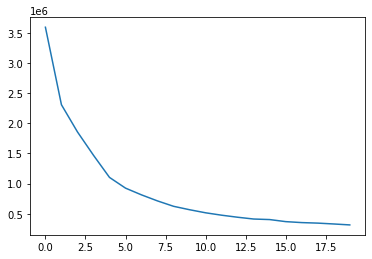

In [152]:
cluster5 = kMeans(combine1[['Elura','Nocita','Onsior','Ultra Fel-O-Vax']],5)
cluster5

In [153]:
RFM_km = pd.concat([combine1, pd.Series(cluster5.labels_)], axis=1)
RFM_km.columns = ['CRM ID','Overall Score', 'Elura','Nocita','Onsior','Ultra Fel-O-Vax','ClusterID']

#RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_Elura = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Elura.mean())
km_clusters_Nocita = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Nocita.mean())
km_clusters_Onsior = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Onsior.mean())
#km_clusters_Rabvac = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Rabvac.mean())
km_clusters_Ultra = 	pd.DataFrame(RFM_km.groupby(["ClusterID"])['Ultra Fel-O-Vax'].mean())

In [154]:
RFM_km = RFM_km[RFM_km['CRM ID'].notna()]

In [155]:
RFM_km.fillna(0,inplace=True)

In [156]:
RFM_km['CRM ID'] = RFM_km['CRM ID'].astype('int')
RFM_km

,CRM ID,Overall Score,Elura,Nocita,Onsior,Ultra Fel-O-Vax,ClusterID
0,1000032,109.0,17.0,0.0,25.0,0.0,0
1,1000038,0.0,0.0,0.0,0.0,0.0,2
2,1000041,23.0,1.0,0.0,7.0,0.0,2
3,1000064,51.0,0.0,0.0,17.0,0.0,1
4,1000068,24.0,0.0,0.0,8.0,0.0,2
...,...,...,...,...,...,...,...
23650,20470963,30.0,0.0,0.0,10.0,0.0,2
23651,20471611,33.0,0.0,0.0,11.0,0.0,2
23652,20471982,24.0,0.0,0.0,8.0,0.0,2
23653,20472013,63.0,0.0,0.0,21.0,0.0,1


In [157]:
Elura.shape

(9994, 12)

In [158]:
combine2 = pd.merge(RFM_km, Elura, how='left', on=['CRM ID'])
combine2.fillna(0,inplace=True)

In [159]:
combine3 = pd.merge(combine2, df, how='left', on=['CRM ID'])
combine3.fillna(0,inplace=True)

In [160]:
emaildata.shape

(86952, 12)

In [161]:
combine4 = pd.merge(combine3,emaildata,how='outer', on=['CRM ID'])


In [170]:
combine4.loc[combine4['Overall Score'] > 100,'High Score Accounts'] = 1


In [162]:
combine4.to_excel("final4.xlsx")

In [ ]:
def conditions(s):
    if (s['nb_months'] < 3) and ((s['Monetary_d'] > 6) or (s['total'] > 100)):
        return 1
    else:
        return 0

In [226]:
#Elura Early Adopters
combine4.loc[(combine4['nb_months'] < 3) & (combine4['Monetary_d'] > 6),'Elura Early Adopters'] = 1

In [227]:
# Cluster 3 and 4 and high score accounts =1 (overall score >100)
combine4.loc[(combine4['Overall Score'] > 100)&((combine4['ClusterID'] == 3) | (combine4['ClusterID'] == 4 )),'Selected'] = 2
combine4.fillna(0,inplace=True)

In [233]:
combine4.columns

Index(['CRM ID', 'Overall Score', 'Elura', 'Nocita', 'Onsior',
       'Ultra Fel-O-Vax', 'ClusterID', 'Frequency', 'Recency', 'Monetary',
       'MinDate', 'MaxDate', 'Recency_d', 'Frequency_d', 'Monetary_d', 'score',
       'Start Date', 'nb_months', 'Q1', 'Q2', 'Q3', 'Q4', 'Account Name',
       'Account Classification', 'Mars Exclusion\nFlag', 'Inactive Flag',
       'Any Exclusion\nFlag', 'Cat Name\nFlag', 'Cat Friendly Clinics\nFlag',
       'Specialty Clinics', 'Nocita Users',
       'Feline pain webinar\nattendees Flag', 'VIP program\nattendees Flag',
       'High Score Accounts', 'Selected', 'Elura Early Adopters', 'accounts'],
      dtype='object')

In [240]:
combine4['accounts'] = combine4['Selected'] + combine4['Elura Early Adopters'] #+ combine4['Cat Friendly Clinics\nFlag']

In [241]:
combine4['accounts'].value_counts()

0.0    83340
2.0     1793
1.0     1550
3.0      371
Name: accounts, dtype: int64

In [236]:
combine4.head()

,CRM ID,Overall Score,Elura,Nocita,Onsior,Ultra Fel-O-Vax,ClusterID,Frequency,Recency,Monetary,...,Cat Name\nFlag,Cat Friendly Clinics\nFlag,Specialty Clinics,Nocita Users,Feline pain webinar\nattendees Flag,VIP program\nattendees Flag,High Score Accounts,Selected,Elura Early Adopters,accounts
0,1000032,109.0,17.0,0.0,25.0,0.0,0.0,6.0,0.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0
1,1000038,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,1000041,23.0,1.0,0.0,7.0,0.0,2.0,1.0,251.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,1000064,51.0,0.0,0.0,17.0,0.0,1.0,1.0,368.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,1000068,24.0,0.0,0.0,8.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0


In [235]:
combine4.accounts.value_counts()

0.0    82646
1.0     2185
2.0     1806
3.0      407
4.0       10
Name: accounts, dtype: int64

In [197]:
combine1.shape

(23655, 6)

In [188]:
import os
os.getcwd()

'C:\\Projects\\Zorbium MVP'

In [192]:
final4A = pd.read_excel(r"final4_A.xlsx")

In [195]:
dict1 = dict(zip(final4A['CRM ID'],final4A['Territory Number']))

In [194]:
final4A.tail()

,Unnamed: 0,CRM ID,Territory Number,Overall Score,Elura,Nocita,Onsior,Ultra Fel-O-Vax,ClusterID,Frequency,...,Any Exclusion\nFlag,Cat Name\nFlag,Cat Friendly Clinics\nFlag,Specialty Clinics,Nocita Users,Feline pain webinar\nattendees Flag,VIP program\nattendees Flag,High Score Accounts,Early AdoptersFlag,Selected
87049,87049,20459972,US_CA_T1H,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
87050,87050,20460003,US_CA_T21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
87051,87051,20460010,US_CA_T6U,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
87052,87052,20460026,US_CA_T4O,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
87053,87053,20460037,US_CA_T25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [182]:
combine4.head()

,CRM ID,Overall Score,Elura,Nocita,Onsior,Ultra Fel-O-Vax,ClusterID,Frequency,Recency,Monetary,...,Inactive Flag,Any Exclusion\nFlag,Cat Name\nFlag,Cat Friendly Clinics\nFlag,Specialty Clinics,Nocita Users,Feline pain webinar\nattendees Flag,VIP program\nattendees Flag,High Score Accounts,Selected
0,1000032,109.0,17.0,0.0,25.0,0.0,0.0,6.0,0.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,1000038,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1000041,23.0,1.0,0.0,7.0,0.0,2.0,1.0,251.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1000064,51.0,0.0,0.0,17.0,0.0,1.0,1.0,368.0,128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1000068,24.0,0.0,0.0,8.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN


In [165]:
import dtale as dt
v1 = dt.show(combine4)

In [166]:
v1.open_browser()

Executing shutdown due to inactivity...


2022-06-15 17:20:39,847 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-06-15 17:20:44,013 - INFO     - Executing shutdown...


with pd.ExcelWriter('RFM.xlsx') as writer1:
    final.to_excel(writer1, sheet_name = 'final', index = False)
    decile.to_excel(writer1, sheet_name = 'decile', index = False)